In [ ]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,r2_score
from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Spam sms detection/spam.csv",encoding='latin-1',engine="python",usecols=['v1','v2'])

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
df.shape

(5572, 2)

In [9]:
df.size

11144

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
df.columns=["label","message"]

In [13]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().values.any()

False

In [15]:
df.isnull().sum()

,0
label,0
message,0


In [16]:
df.duplicated().values.any()

True

In [17]:
df.duplicated().sum()

403

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [20]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


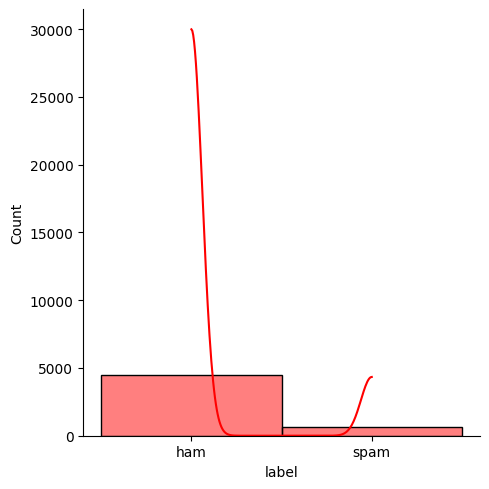

In [21]:
sns.displot(df.label,kde=True,color="red")

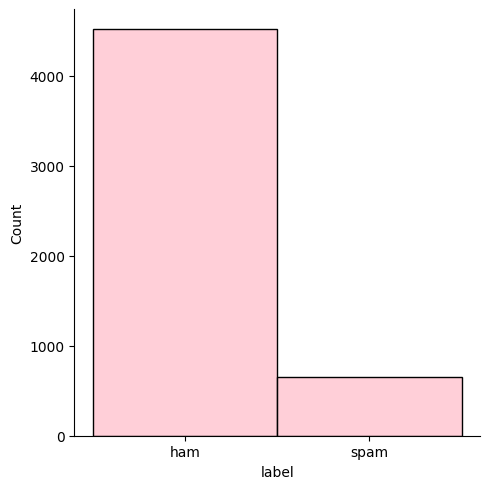

In [22]:
sns.displot(df.label,color="pink")

In [23]:
encoder=LabelEncoder()
df["label"]=encoder.fit_transform(df["label"].values)

In [24]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
vectorizer=TfidfVectorizer()

In [28]:
X=vectorizer.fit_transform(df["message"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
Y=df["label"]

In [30]:
X.shape

(5169, 8672)

In [31]:
Y.shape

(5169,)

In [32]:
df.count()

,0
label,5169
message,5169


In [33]:
p,k=len(df[df["label"]==0]),len(df[df["label"]==1])

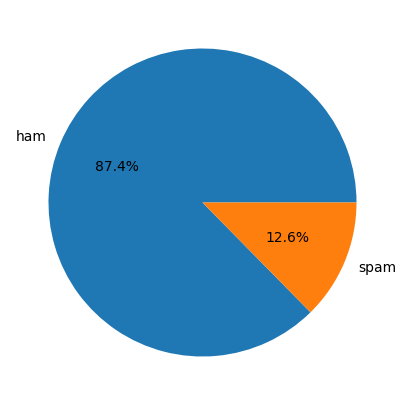

In [34]:
label=np.array(["ham","spam"])
values=np.array([p,k])
plt.figure(figsize=(5,5))
plt.pie(values,labels=label,autopct="%1.1f%%")
plt.show()

In [36]:
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [39]:
naive_bayes_model=MultinomialNB()
naive_bayes_model.fit(X_train,Y_train)

MultinomialNB()

In [40]:
nb_predictions=naive_bayes_model.predict(X_test)

In [46]:
print("Naive Bayes Model:")
print(confusion_matrix(Y_test,nb_predictions))
print(classification_report(Y_test,nb_predictions))
print("Accuracy:",accuracy_score(Y_test,nb_predictions))
print("r2_score:",r2_score(Y_test,nb_predictions))
print("precision_score:",precision_score(Y_test,nb_predictions))
print("Recall_score:",recall_score(Y_test,nb_predictions))
print("f1_score:",f1_score(Y_test,nb_predictions))


Naive Bayes Model:
[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy: 0.9555125725338491
r2_score: 0.6310150886311625
precision_score: 1.0
Recall_score: 0.6827586206896552
f1_score: 0.8114754098360656


In [47]:
logistic_regression_model=LogisticRegression()

In [48]:
logistic_regression_model.fit(X_train,Y_train)

LogisticRegression()

In [49]:
lr_predictions=logistic_regression_model.predict(X_test)

In [50]:
print("Logistic Regression Model:")
print(confusion_matrix(Y_test,lr_predictions))
print(classification_report(Y_test,lr_predictions))
print("Accuracy:",accuracy_score(Y_test,lr_predictions))
print("r2_score:",r2_score(Y_test,lr_predictions))
print("precision_score:",precision_score(Y_test,lr_predictions))
print("Recall_score:",recall_score(Y_test,lr_predictions))
print("f1_score:",f1_score(Y_test,lr_predictions))

Logistic Regression Model:
[[886   3]
 [ 43 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

Accuracy: 0.9555125725338491
r2_score: 0.6310150886311625
precision_score: 0.9714285714285714
Recall_score: 0.7034482758620689
f1_score: 0.8160000000000001


In [51]:
svm_model=SVC(kernel='linear')

In [52]:
svm_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [53]:
svm_predictions=svm_model.predict(X_test)

In [57]:
print("Support Vector Machine: SVM Model")
print(confusion_matrix(Y_test,svm_predictions))
print(classification_report(Y_test,svm_predictions))
print("Accuracy:",accuracy_score(Y_test,svm_predictions))
print("r2_score:",r2_score(Y_test,svm_predictions))
print("precision_score:",precision_score(Y_test,svm_predictions))
print("Recall_score:",recall_score(Y_test,svm_predictions))
print("f1_score:",f1_score(Y_test,svm_predictions))

Support Vector Machine: SVM Model
[[886   3]
 [ 14 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.90      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Accuracy: 0.9835589941972921
r2_score: 0.8636360110158644
precision_score: 0.9776119402985075
Recall_score: 0.903448275862069
f1_score: 0.939068100358423
